In [70]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [71]:
file  = pd.read_csv('Resources/Food_Supply_Quantity_kg_Data.csv')
df = pd.DataFrame(file)
df.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [72]:
df_new = df.drop(columns=['Country','Confirmed', 'Recovered', 'Active', 'Population', 'Unit (all except Population)','Obesity','Undernourished'])
df_new

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Deaths
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,0.006186
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,0.050951
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,0.006558
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,0.001461
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,0.007143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,...,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,0.004287
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,...,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,0.000036
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,...,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,0.002062
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,...,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,0.004564


In [73]:
df_new = df_new.dropna()
df_new

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Deaths
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,0.006186
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,0.050951
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,0.006558
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,0.001461
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,0.007143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,...,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,0.004287
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,...,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,0.000036
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,...,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,0.002062
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,...,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,0.004564


In [74]:
DeathCategory= pd.cut(x=df_new['Deaths'], bins=[0, 0.05, 0.10, 0.15, 0.2],
                    labels=[0,1,2,3], include_lowest=True)
df_new.insert(loc=6, column='DeathCategory', value=DeathCategory)
df_new

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,DeathCategory,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Deaths
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0,0.0350,5.3495,1.2020,...,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,0.006186
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,1,0.2126,6.7861,1.8845,...,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,0.050951
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0,0.2416,6.3801,1.1305,...,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,0.006558
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,0,1.7707,6.0005,2.0571,...,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,0.001461
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,0,4.1489,10.7451,5.6888,...,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,0.007143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0,0.9456,7.6460,3.8328,...,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,0.004287
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,0,2.6392,5.9029,4.4382,...,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,0.000036
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0,0.5240,5.1344,2.7871,...,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,0.002062
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,0,1.6924,1.0183,1.8427,...,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,0.004564


In [75]:
X = df_new.drop(['Deaths', 'DeathCategory'], axis=1)
X

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.2953,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.2380,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.4783,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.6507,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,0.1840,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,...,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416
166,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,...,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232
167,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,...,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126
168,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,...,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789


In [76]:
y = df_new['DeathCategory']
y

0      0
1      1
2      0
3      0
4      0
      ..
165    0
166    0
167    0
168    0
169    0
Name: DeathCategory, Length: 164, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [77]:
y1 = df_new['Deaths']
y1

0      0.006186
1      0.050951
2      0.006558
3      0.001461
4      0.007143
         ...   
165    0.004287
166    0.000036
167    0.002062
168    0.004564
169    0.008854
Name: Deaths, Length: 164, dtype: float64

In [78]:
np.any(np.isnan(y1))

False

In [79]:
np.all(np.isfinite(y1))

True

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [81]:
reg = LinearRegression().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)


0.4800310376492841

In [82]:
reg = Lasso().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

-0.019111051080370034

In [83]:
# Convert y into classes rather than have a continuous variable

In [84]:
print(y.to_string())

0      0
1      1
2      0
3      0
4      0
5      2
6      2
7      0
8      1
9      0
10     0
11     0
12     0
13     0
14     3
15     1
16     0
17     1
18     2
19     0
20     2
21     2
22     0
23     0
24     0
25     0
26     1
27     0
28     0
29     1
30     0
31     2
32     0
33     1
34     0
35     2
36     0
37     0
38     3
39     0
40     0
41     0
42     0
43     1
44     0
45     0
46     0
47     1
48     0
49     0
50     0
51     2
53     0
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     2
67     0
68     0
69     0
70     1
71     0
72     1
73     1
74     3
75     0
76     0
77     0
78     0
79     0
82     0
83     0
84     0
85     0
86     1
87     1
88     0
89     0
90     2
91     1
92     0
93     0
94     0
95     0
96     0
97     1
98     0
99     0
100    2
101    0
102    2
103    0
104    0
106    0
107    0
108    1
110    0
111    0
112    0
113    0
114    2
115    0
1

In [85]:
y = y.astype('int', copy=False)
y

0      0
1      1
2      0
3      0
4      0
      ..
165    0
166    0
167    0
168    0
169    0
Name: DeathCategory, Length: 164, dtype: int32

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [87]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6097560975609756


[0.05091593 0.05304721 0.08103791 0.02199687 0.03890296 0.06499249
 0.04321174 0.02344928 0.03810528 0.10337767 0.05060187 0.03564642
 0.04777796 0.03147635 0.03313012 0.03790318 0.03569457 0.02371128
 0.00424427 0.03511332 0.02745131 0.03562694 0.08258508]


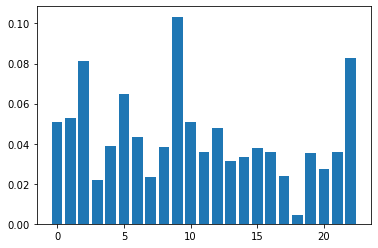

In [93]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [ ]:

fig = plt.figure()
plt.plot(data)
fig.suptitle('test title', fontsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
fig.savefig('test.jpg')

In [90]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True, False, False,  True, False, False, False,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True])

In [62]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [63]:
X_selected_train

array([[1.69820e+00, 1.52900e-01, 1.86770e+01, 7.58200e-01, 1.24535e+01,
        2.74000e-02, 2.91400e-01, 3.13238e+01],
       [1.70370e+00, 9.57000e-02, 1.03765e+01, 1.46760e+00, 4.40930e+00,
        3.48000e-02, 5.27600e-01, 3.96240e+01],
       [3.41350e+00, 2.33000e-02, 6.09140e+00, 1.20400e-01, 2.78930e+00,
        3.89800e-01, 7.25000e-02, 4.38988e+01],
       [1.97160e+00, 3.07400e-01, 6.71080e+00, 3.52700e-01, 1.04500e-01,
        1.92500e-01, 5.42500e-01, 4.32905e+01],
       [2.62500e+00, 1.75300e-01, 1.31214e+01, 8.43400e-01, 8.54420e+00,
        7.00000e-03, 1.75000e-02, 3.68777e+01],
       [5.31520e+00, 2.35700e-01, 1.83382e+01, 7.32100e-01, 9.59910e+00,
        0.00000e+00, 2.65000e-01, 3.16581e+01],
       [3.56500e+00, 2.21200e-01, 1.24976e+01, 7.79200e-01, 2.20410e+00,
        3.30200e+00, 8.73400e-01, 3.75167e+01],
       [3.13150e+00, 1.27600e-01, 1.21319e+01, 9.22600e-01, 2.71830e+00,
        1.28730e+00, 1.37680e+00, 3.78648e+01],
       [2.62100e-01, 5.71000e-02

In [64]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8130081300813008
Testing Score: 0.6341463414634146


In [65]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7804878048780488
Testing Score: 0.5609756097560976


It doesn't really help to scale down the features in this case. 